In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import warnings
warnings.filterwarnings("ignore") 


In [88]:
pip install yfinance

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [89]:
import yfinance as yf

In [90]:
raw = yf.download('SPY AAPL', start= '2010-01-01', end= '2023-07-31')

[*********************100%%**********************]  2 of 2 completed


In [7]:
raw

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.487534   87.791786    7.643214  113.330002    7.660714   
2010-01-05    6.498751   88.024178    7.656429  113.629997    7.699643   
2010-01-06    6.395379   88.086143    7.534643  113.709999    7.686786   
2010-01-07    6.383556   88.458008    7.520714  114.190002    7.571429   
2010-01-08    6.425997   88.752365    7.570714  114.570000    7.571429   
...                ...         ...         ...         ...         ...   
2023-07-24  192.490067  454.200012  192.750000  454.200012  194.910004   
2023-07-25  193.358887  455.440002  193.619995  455.440002  194.440002   
2023-07-26  194.237701  455.510010  194.500000  455.510010  195.639999   
2023-07-27  192.959427  452.489990  193.220001  452.489990  197.199997   
2023-07-28  195.565918  456.920013  195.830002  456.920013  196.630005   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2010-01-04  113.389999    7.585000  111.510002    7.622500  112.370003   
2010-01-05  113.680000    7.616071  112.849998    7.664286  113.260002   
2010-01-06  113.989998    7.526786  113.430000    7.656429  113.519997   
2010-01-07  114.330002    7.466071  113.180000    7.562500  113.500000   
2010-01-08  114.620003    7.466429  113.660004    7.510714  113.889999   
...                ...         ...         ...         ...         ...   
2023-07-24  455.040009  192.250000  452.299988  193.410004  453.369995   
2023-07-25  456.739990  192.919998  453.869995  193.330002  453.920013   
2023-07-26  456.989990  193.320007  453.380005  193.669998  454.470001   
2023-07-27  459.440002  192.550003  451.549988  196.020004  459.019989   
2023-07-28  457.779999  194.139999  452.489990  194.669998  455.880005   

               Volume             
                 AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2023-07-24   45377800   54023400  
2023-07-25   37283200   55191200  
2023-07-26   47471900   71052900  
2023-07-27   47460200   92194400  
2023-07-28   48291400   80011800  

[3415 rows x 12 columns]

In [91]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [92]:
#selecting AAPl columns 
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df


(raw.iloc[:,::2].pipe(fix_cols))

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.498750,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.395378,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.383557,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2023-07-24,192.490067,192.750000,194.910004,192.250000,193.410004,45377800
2023-07-25,193.358887,193.619995,194.440002,192.919998,193.330002,37283200
2023-07-26,194.237701,194.500000,195.639999,193.320007,193.669998,47471900


In [93]:
#tweak function 

def fix_cols(df):
    columns = df.columns
    outer = [cols[0] for cols in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start= '2010-01-01', end= '2023-07-31')
    return (raw.iloc[:,::2].pipe(fix_cols))

tweak_data()

[*********************100%%**********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.498751,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.395378,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.383555,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2023-07-24,192.490067,192.750000,194.910004,192.250000,193.410004,45377800
2023-07-25,193.358887,193.619995,194.440002,192.919998,193.330002,37283200
2023-07-26,194.237701,194.500000,195.639999,193.320007,193.669998,47471900


<AxesSubplot:xlabel='Date'>

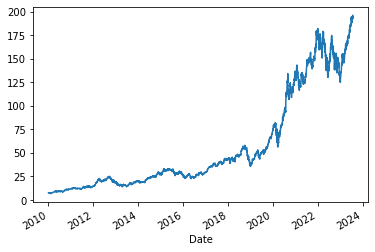

In [94]:
# LINE PLOT

(raw.iloc[:,::2].pipe(fix_cols).Close.plot())

<AxesSubplot:xlabel='Date'>

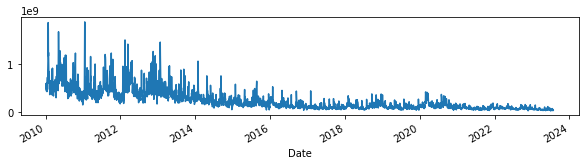

In [95]:
(raw.iloc[:,::2].pipe(fix_cols).Volume.plot(figsize=(10,2)))

<AxesSubplot:xlabel='Date'>

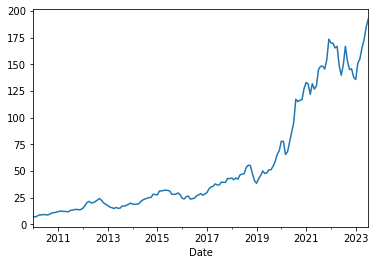

In [96]:
#RESAMPLING 
#Changing data from one granularity to another granularity -> date data to monthly, yearly or quaterly data 

(raw.iloc[:,::2].pipe(fix_cols).resample('M').Close.mean().plot())

,Open,High,Low,Close
Date,,,,
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN
2023-01-03,130.279999,130.899994,124.169998,125.070000
2023-01-04,126.889999,128.660004,125.080002,126.360001
2023-01-05,127.129997,127.769997,124.760002,125.019997
...,...,...,...,...
2023-07-24,193.410004,194.910004,192.250000,192.750000
2023-07-25,193.330002,194.440002,192.919998,193.619995
2023-07-26,193.669998,195.639999,193.320007,194.500000


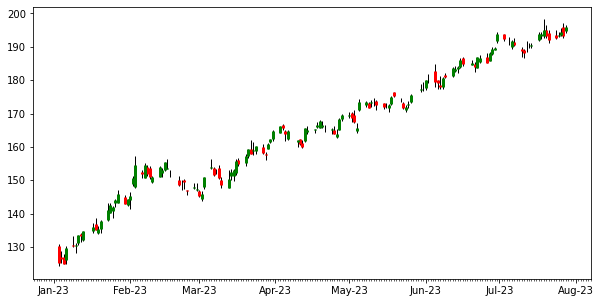

In [97]:
#CANDLESTICK PLOT 
fig, ax = plt.subplots(figsize=(10,5))
def plot_candle(df, ax):
    #wick
    ax.vlines(x=df.index, ymin=df.Low, ymax= df.High, colors='k', linewidth=1)
    #red = decrease 
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    #green = increase
    green= df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(raw
.iloc[:,::2]
.pipe(fix_cols)
.resample('d')
.agg({'Open': 'first','High':'max', 'Low':'min','Close':'last'})
.loc['jan 2023':'jul 2023']
.pipe(plot_candle, ax))

In [98]:
#CALCULATIONS

#percentage change 

aapl = (raw.iloc[:,::2].pipe(fix_cols))

aapl



,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.498750,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.395378,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.383557,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2023-07-24,192.490067,192.750000,194.910004,192.250000,193.410004,45377800
2023-07-25,193.358887,193.619995,194.440002,192.919998,193.330002,37283200
2023-07-26,194.237701,194.500000,195.639999,193.320007,193.669998,47471900


In [99]:
#returns 

aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001848,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2023-07-24,0.004220,0.004220,-0.000308,0.005334,-0.003555,-0.369032
2023-07-25,0.004514,0.004514,-0.002411,0.003485,-0.000414,-0.178382
2023-07-26,0.004545,0.004545,0.006172,0.002073,0.001759,0.273279


<AxesSubplot:>

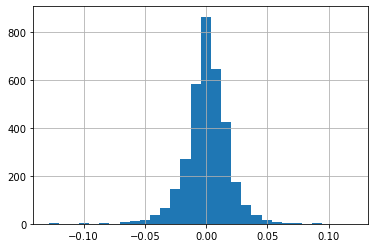

In [100]:
# PLOT RETURNS
(aapl.pct_change().Close.hist(bins=30))

Date
2023-03-07   -0.014496
2023-03-08    0.008377
2023-03-09   -0.014915
2023-03-10   -0.013879
2023-03-13    0.013266
                ...   
2023-07-24    0.004220
2023-07-25    0.004514
2023-07-26    0.004545
2023-07-27   -0.006581
2023-07-28    0.013508
Name: Close, Length: 100, dtype: float64

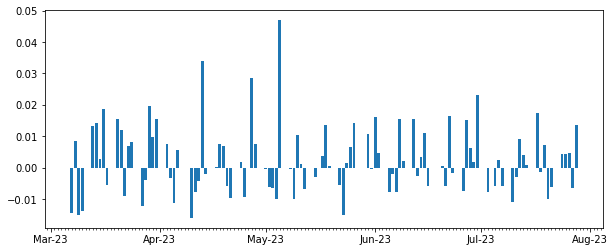

In [101]:
#Bar Plot using matplotlib 
fig, ax = plt.subplots(figsize=(10,4))
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

(aapl.pct_change().Close.iloc[-100:].pipe(my_bar, ax))




<AxesSubplot:xlabel='Date'>

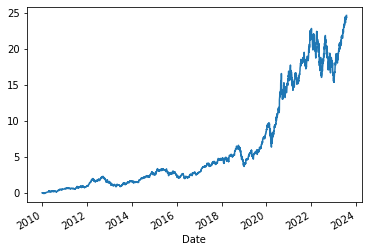

In [102]:
#Cumulative Returns : The amount that investment has gained or lost over time 
def cal_cum_returns(df, col):
    ser = df[col]
    return(ser.sub(ser[0]).div(ser[0]))

(aapl.pipe(cal_cum_returns, 'Close').plot())



In [103]:
#Lambda

def get_returns(df):
    return cal_cum_returns(df, 'Close')

(lambda df: get_returns(df))(aapl)

Date
2010-01-04     0.000000
2010-01-05     0.001729
2010-01-06    -0.014205
2010-01-07    -0.016027
2010-01-08    -0.009486
                ...    
2023-07-24    24.218448
2023-07-25    24.332274
2023-07-26    24.447409
2023-07-27    24.279941
2023-07-28    24.621420
Name: Close, Length: 3415, dtype: float64

In [104]:
#Create a new column

(aapl.assign(cum_returns = lambda df:cal_cum_returns(df, 'Close')))

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.498750,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.395378,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.383557,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2023-07-24,192.490067,192.750000,194.910004,192.250000,193.410004,45377800,24.218448
2023-07-25,193.358887,193.619995,194.440002,192.919998,193.330002,37283200,24.332274
2023-07-26,194.237701,194.500000,195.639999,193.320007,193.669998,47471900,24.447409


Date
2023-03-07    18.834588
2023-03-08    19.000747
2023-03-09    18.702443
2023-03-10    18.428999
2023-03-13    18.686744
                ...    
2023-07-24    24.218448
2023-07-25    24.332274
2023-07-26    24.447409
2023-07-27    24.279941
2023-07-28    24.621420
Name: Close, Length: 100, dtype: float64

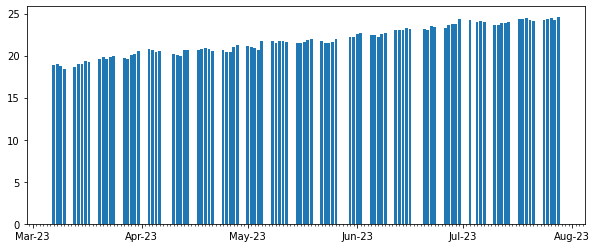

In [105]:
#Returns - Matplotlib

fig, ax = plt.subplots(figsize=(10,4))
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

(aapl.pipe(cal_cum_returns, 'Close').iloc[-100:].pipe(my_bar, ax))
    



In [106]:
(aapl.assign(pct_change_close=aapl.Close.pct_change())
 .pct_change_close
 .std())

0.01791585261674006

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

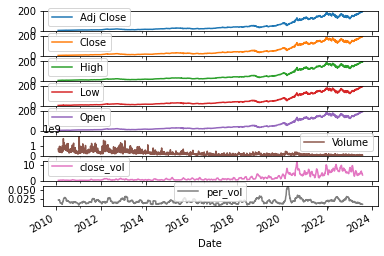

In [107]:
(aapl
 .assign(close_vol=aapl.rolling(30).Close.std(),
       per_vol=aapl.Close.pct_change().rolling(30).std())
 .iloc[:-2,:]
 .iloc[28:]
 .plot(subplots=True)
)

In [108]:
#15 day volatility
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .resample('15D')
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,0.078053,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.010383
2010-01-19,0.226749,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.030046
2010-02-03,0.113049,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017088
2010-02-18,0.136917,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.011254
2010-03-05,0.074273,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.014002
...,...,...,...,...,...,...,...
2023-05-26,1.874136,1.876667,2.387578,1.944008,2.705515,2.353859e+07,0.009132
2023-06-10,1.336946,1.338753,1.378100,1.310676,1.586397,1.632607e+07,0.008815
2023-06-25,2.583410,2.586897,2.356616,2.349653,2.574730,1.430164e+07,0.010866


<AxesSubplot:xlabel='Date'>

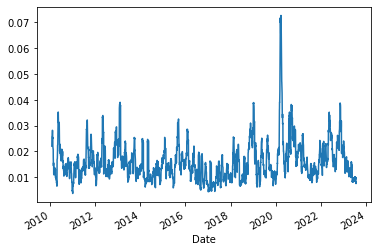

In [109]:
(aapl
 .assign(pct_change=aapl.Close.pct_change())
 .rolling(window=15, min_periods=15)
 .std()
 ['pct_change']
 .plot())

In [110]:
#shift to 

(aapl
 .assign(s1=aapl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:,['Close','s1','s2']].mean(axis='columns'),
         ma3_builtin=aapl.Close.rolling(3).mean()))

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,7.643214,NaN
2010-01-05,6.498750,7.656429,7.699643,7.616071,7.664286,601904800,7.643214,NaN,7.649822,NaN
2010-01-06,6.395378,7.534643,7.686786,7.526786,7.656429,552160000,7.656429,7.643214,7.611429,7.611429
2010-01-07,6.383557,7.520714,7.571429,7.466071,7.562500,477131200,7.534643,7.656429,7.570595,7.570595
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800,7.520714,7.534643,7.542024,7.542024
...,...,...,...,...,...,...,...,...,...,...
2023-07-24,192.490067,192.750000,194.910004,192.250000,193.410004,45377800,191.940002,193.130005,192.606669,192.606669
2023-07-25,193.358887,193.619995,194.440002,192.919998,193.330002,37283200,192.750000,191.940002,192.769999,192.769999
2023-07-26,194.237701,194.500000,195.639999,193.320007,193.669998,47471900,193.619995,192.750000,193.623332,193.623332


<AxesSubplot:xlabel='Date'>

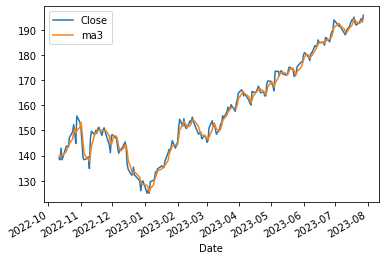

In [111]:
(aapl
 .assign(s1=aapl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:,['Close','s1','s2']].mean(axis='columns'),
         ma3_builtin=aapl.Close.rolling(3).mean()
        )
 [['Close','ma3']]
 .iloc[-200:]
 .plot()
 
 
)

<AxesSubplot:xlabel='Date'>

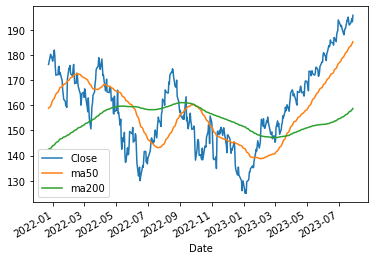

In [112]:
(aapl
 .assign(ma50=aapl.Close.rolling(50).mean(),
         ma200=aapl.Close.rolling(200).mean(),
        )
 [['Close','ma50','ma200']]
 .iloc[-400:]
 .plot()
)

<AxesSubplot:xlabel='Date'>

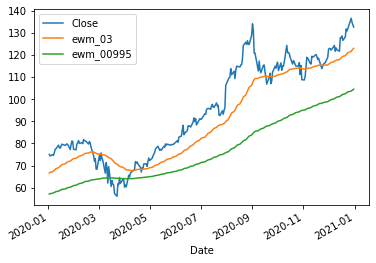

In [113]:
(aapl
 .assign(ewm_03=aapl.Close.ewm(alpha=0.0392).mean(),
            ewm_00995=aapl.Close.ewm(alpha=0.00995).mean())
 .loc['2020':'2020',['Close','ewm_03','ewm_00995']]
 .plot()
)


In [114]:
#On-balance volume

def calc_obv(df, close_col='Close', vol_col='Volume'):
    close = df[close_col]
    vol = df[vol_col]
    close_shift = close.shift(1)
    return (df
           .assign(vol = np.select([close > close_shift,
                                   close == close_shift,
                                   close < close_shift],
                                  [vol, 0, -vol]),
                  obv=lambda df_:df_.vol.fillna(0).cumsum()
                  )
            ['obv']
            
    )

(aapl
 .assign(obv=calc_obv)
)
    

,Adj Close,Close,High,Low,Open,Volume,obv
Date,,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600,0
2010-01-05,6.498750,7.656429,7.699643,7.616071,7.664286,601904800,601904800
2010-01-06,6.395378,7.534643,7.686786,7.526786,7.656429,552160000,49744800
2010-01-07,6.383557,7.520714,7.571429,7.466071,7.562500,477131200,-427386400
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800,20224400
...,...,...,...,...,...,...,...
2023-07-24,192.490067,192.750000,194.910004,192.250000,193.410004,45377800,15984280500
2023-07-25,193.358887,193.619995,194.440002,192.919998,193.330002,37283200,16021563700
2023-07-26,194.237701,194.500000,195.639999,193.320007,193.669998,47471900,16069035600


<AxesSubplot:xlabel='Date'>

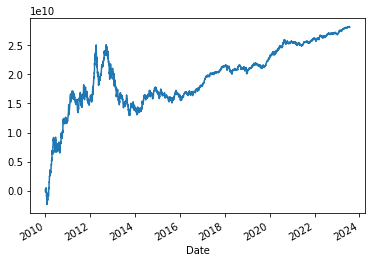

In [115]:
def calc_ad(df, close_col='Close', low_col='Low', high_col='High',
           vol_col='Volume'):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    return (df
        .assign(mfm=((close-low) - (high - close))/(high-low),
               mfv=lambda df_:df_.mfm*df_[vol_col],
               cmfv=lambda df_:df_.mfv.cumsum())
        .cmfv
    )
(aapl
 .assign(ad=calc_ad)
 .ad
 .plot()
)